# Homework 2 - Logistic Regression
## CSCI 5622 - Spring 2020
***
## SCOTT SCHERAGA

This assignment is due on Canvas by **11.59 PM on Friday, February 28th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted. The only exception to this rule is that you may copy code directly from your own solution to homework 1.

## Overview 
***


Your task for this homework is to build a logistic regression model that implements stochastic gradient ascent. You'll apply it to the task of determining whether a number is 8 or 9

We start by importing and plotting the given data

In [1]:

import matplotlib.pylab as plt
import sklearn
import sklearn.datasets
import math
%matplotlib inline 

### [ 70 points] Problem 1: Implementing the Logistic Regression Classifier for Binary Classification
***

In [2]:
## import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8
        """
        # To test stuff
        #print("train_x shape= ",self.train_x.shape)
        #print("train_y shape= ",self.train_y.shape)
        
        #print(self.train_x[266])
        num=120
    
        test1= np.reshape(self.train_x[num], (28, 28))
        plt.gray()
        #plt.matshow(test1)
        plt.imshow(test1, cmap=plt.get_cmap('gray'))
        plt.show()
        print("y value = ",self.train_y[num])
        """
        #NOTES:
        #There are 9830 items in the set "Data".
        #train_x shape=  (9830, 784)
        #an image in the MNIST set is 784 data points, to make up a 28x28 image
        #train_y shape=  (9830,)
        
        #8's have a y value of 0
        #9's have a y value of 1
        

In [3]:
data = Numbers('./mnist.pklz')


In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output the corresponding label.
* [10 pts] Finish the `calculate_score` function to return the output of applying the dot product of the weights with the input parameter

* [10 pts] Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

* [10 pts] Finish the `compute_gradient` function to return the derivate of the cost w.r.t. the weights

* [10 pts] Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

* [10 pts] Finish the `mini_batch_update` function so that it performs mini-batch gradient descent on the batches of the training data set example and updates the weight vector correspondingly

In [4]:
from collections import defaultdict
import math
from random import seed
from random import random
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
seed(1)

class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.eta = eta
        self.w = np.zeros(X.shape[1]) # can remove from here and ask to be defined in the function
        
        #Create intial weights of small numbers for each x.
        #They range from around 0.003 to 0.09 
        #self.w = (np.random.rand(X.shape[1]))/10
        #print("w_initial= ", self.w)
        #gradientlist=[]
      
        #Separate X and y into Training(75%) and test sets (25%)
        #self.Train_x,self.test_x,self.Train_y,self.test_y= train_test_split(
            #self.X, self.y, test_size=0.25, shuffle=True)
        
        #gradient=5 #initialize gradient to a big number
        
        #### While not converged ADD A FOR LOOP HERE!
        #grad=0
        """
        for g in range(0,10): #loop occurs 10 times
           
        #while np.absolute(gradient) > 0.1:
        #For each epoch, Separate X and y Training sets into differently 
        #shuffled grad decent training(67%) and validation sets (33%)
            self.train_x,self.validation_x,self.train_y,self.validation_y= train_test_split(
                self.X, self.y, test_size=0.33, shuffle=True)
            #print("self.train_x= ", self.train_x)
       """
        #for each point or mnist number
            
            
            #self.w=self.sgd_update(self.train_x, self.train_y)   
            
        #print("w_final= ", self.w)            
        #print("end of epoch loops")
        """
        plt.plot(range(0,np.size(gradientlist)),np.absolute(gradientlist))
        plt.ylabel('Gradient')
        plt.xlabel('Epoch #')
        plt.suptitle('Gradients')
        plt.show()
        """
        
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n 
        training examples
        :return score: Calculate the score that you will plug into the
        logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        score = np.dot(self.w,x)
        return score
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to 
        convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the 
        sigmoid function to the score. This could 
        be a single value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        sigmd = 1/(1+(np.exp(-1*score)))      
        #print("sigmoid= ",sigmd)
        return sigmd
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        # TODO: Finish this function to compute the gradient
        #gradient=self.sigmoid(self.calculate_score(x))-y
        gradient=h-y
        
        #print("h= ",h)
        #print("gradient= ",gradient)
        
        return gradient
     
    def sgd_update(self,x_i,y):
        """
        Compute a stochastic gradient update over the entire dataset to improve the 
        log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        #weights=0
        #x_i=self.X
        #y=self.y
        for i in range(0,np.size(x_i,0)):
                #print("size=", np.size(x_i,0))
                #print("x_i[i,:]=",x_i[i,:])
                grad=self.compute_gradient(
                    x_i[i,:],self.sigmoid(self.calculate_score(x_i[i,:])), y[i])
                #print("gradient=",grad)
            #for each dimension in the point or mnist number
                for k in range(0,np.size(x_i,1)):
                    #print("x_i[i,k]=",x_i[i,k])
                    self.w[k]=self.w[k]-(self.eta*grad*x_i[i,k])
        #gradientlist.append(grad)            
                    #print("weights=",self.w)
        return self.w
    
    def mini_batch_update(self, X, y, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        x_i=X
        GradXsum = np.zeros(np.size(x_i,1))
        #GradXsum[1]=4

        #print("np.size(X,0)=",np.size(X,0))
        #To go between batches
        for n in range(0,np.size(x_i,0),batch_size):
            GradXsum = np.zeros(np.size(x_i,1))
            #print("----------")
            #print("batch# ",n)
            #n= 0,2,4

            #within each batch
            for i in range(n,n+batch_size):
                if i<np.size(X,0):
                    #print("i=",i)
                    #print("x_i[i,:]=",x_i[i,:])
                    grad=self.compute_gradient(
                        x_i[i,:],self.sigmoid(self.calculate_score(x_i[i,:])), y[i])
                    
                    #Res
                    
                    #print("gradient=",grad)
                #for each dimension in the point or mnist number
                     #for k in range(0,np.size(x_i,1)):
                        #print ("grad*x_i[i,k],k=",k,"  ",grad*x_i[i,k])
                    GradXsum+= grad*x_i[i,:]
                    #print("GradXsum=", GradXsum)
                        
            for g in range(0,np.size(x_i,1)):
                self.w[g]=self.w[g]-(self.eta*GradXsum[g])
            #print("weights=",self.w)
        
        
      
        return self.w
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 
        'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional argument to be given only in 
        case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for 
        #an example based on the logistic value
        # and return the log probability and the accuracy of those predictions
        log_prob=0
        accuracymatchestotal=0
        #print("test_x=", test_x)
        #print("test_x[0]=", test_x[0])
        if update_method=='sgd_update':
            #weights=self.sgd_update(test_x, test_y)
            #print("np.size(test_x,0)=", np.size(test_x,0))
            #print("np.size(test_x,1)=", np.size(test_x,1))
            for i in range(0,np.size(test_x,0)):
                
                log_prob+=np.log(self.sigmoid(self.calculate_score(test_x[i])))
                if test_y[i]==1 and self.sigmoid(self.calculate_score(test_x[i]))>=0.5:
                    accuracymatchestotal+=1
                elif test_y[i]==0 and self.sigmoid(self.calculate_score(test_x[i]))<0.5:
                    accuracymatchestotal+=1
                        
            accuracy=accuracymatchestotal/np.size(test_x,0) 
            #print("accuracy=",accuracy)
            #print("log_prob=",log_prob)

        elif update_method=='mini_batch_update':
                batchsize=batch_size[0]
                self.mini_batch_update(test_x, test_y,batchsize)
                
                for i in range(0,np.size(test_x,0)):
                    log_prob+=np.log(self.sigmoid(self.calculate_score(test_x[i])))
                    if test_y[i]==1 and self.sigmoid(self.calculate_score(test_x[i]))>=0.5:
                        accuracymatchestotal+=1
                    elif test_y[i]==0 and self.sigmoid(self.calculate_score(test_x[i]))<0.5:
                        accuracymatchestotal+=1     
                accuracy=0
                if (np.size(test_x,0)>0) :       
                    accuracy=accuracymatchestotal/np.size(test_x,0) 
                
               # accuracy+=np.absolute(test_y[i]-self.sigmoid(self.calculate_score(test_x[i])))
            #self.mini_batch_update(test_x, test_y,batch_size)
        #print("logprob=",log_prob)
        #print("accuracy=",accuracy)
        return log_prob, accuracy

In [5]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,0,1,1,0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
            
    def test_sgd_update(self):
        
        #Test sgd_update function from LogReg
        
        weights = self.log_reg_classifier_1.sgd_update(self.X,self.y)
        print("weights1=", weights)
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        print("first tests complete")
          
    def tests_mini_batch_update(self):
        #Test mini_batch_update function from LogReg
        
        weights = self.log_reg_classifier_2.mini_batch_update(self.X, self.y,2)
        print("weights2=", weights)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        print("second tests complete")
        
    def tests_progress_sgd_update(self):
        
        #Test progress function from LogReg with method = 'sgd_update'
        #print("self.X[:4]=",self.X[:4])
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        self.log_reg_classifier_1.sgd_update(self.X[:4], self.y[:4])
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], 
                                                        self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 1), -0.7)  # Changed to round 1.
        self.assertEqual(accuracy, 0)
        print("third tests complete")
           
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...

weights1= [ 0.1591022  -0.37065522]
first tests complete
weights2= [ 0.17370806 -0.37315947]
second tests complete
third tests complete



----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [9]:
# DO NOT DELETE THIS CELL !!!

In [10]:
# DO NOT DELETE THIS CELL !!!

In [11]:
# DO NOT DELETE THIS CELL !!!

In [12]:
# DO NOT DELETE THIS CELL !!!

In [13]:
# DO NOT DELETE THIS CELL !!!

**Q:** After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART A : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART B : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part A below. DO NOT DELETE THE CELL

Epoch #  0
Epoch #  1
Epoch #  2
Epoch #  3
Epoch #  4
Epoch #  5
Epoch #  6
Epoch #  7
Epoch #  8
Epoch #  9


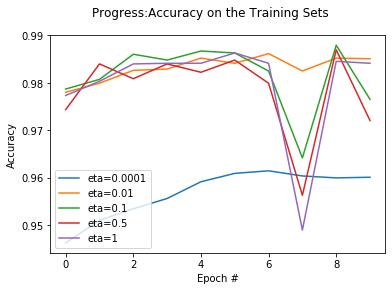

In [61]:
# YOUR CODE HERE

#X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
#y = np.array([0,0,1,1,0])
X=data.train_x
y=data.train_y
XVal=data.valid_x
yVal=data.valid_y

accuracylist1=[]
accuracylist2=[]
accuracylist3=[]
accuracylist4=[]
accuracylist5=[]
etarange=[.0001, .01, .1, .5, 1]
#classifier_1 = LogReg(X, y, 0.5)
#Train_x,test_x,Train_y,test_y= train_test_split(
#                X, y, test_size=0.2, shuffle=True)

classifier_1 = LogReg(X, y, etarange[0])
classifier_2 = LogReg(X, y, etarange[1])
classifier_3 = LogReg(X, y, etarange[2])
classifier_4 = LogReg(X, y, etarange[3])
classifier_5 = LogReg(X, y, etarange[4])
for i in range(0,10):
    print("Epoch # ",i)    
    train_x,test_x,train_y,test_y= train_test_split(
               X,y, test_size=0.25, shuffle=True)
    classifier_1.sgd_update(train_x,train_y)
    classifier_2.sgd_update(train_x,train_y)
    classifier_3.sgd_update(train_x,train_y)
    classifier_4.sgd_update(train_x,train_y)
    classifier_5.sgd_update(train_x,train_y)
    log_prob1, accuracy1 = classifier_1.progress(train_x,train_y, 'sgd_update')
    log_prob2, accuracy2 = classifier_2.progress(train_x,train_y, 'sgd_update')
    log_prob3, accuracy3 = classifier_3.progress(train_x,train_y, 'sgd_update')
    log_prob4, accuracy4 = classifier_4.progress(train_x,train_y, 'sgd_update')
    log_prob5, accuracy5 = classifier_5.progress(train_x,train_y, 'sgd_update')
    
    accuracylist1.append(accuracy1)
    accuracylist2.append(accuracy2)
    accuracylist3.append(accuracy3)
    accuracylist4.append(accuracy4)
    accuracylist5.append(accuracy5)
    
plt.plot(range(0,10),accuracylist1,label="eta=0.0001")
plt.plot(range(0,10),accuracylist2,label="eta=0.01")
plt.plot(range(0,10),accuracylist3,label="eta=0.1")
plt.plot(range(0,10),accuracylist4,label="eta=0.5")
plt.plot(range(0,10),accuracylist5,label="eta=1")
plt.legend(loc="lower left")
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.suptitle('SGD Accuracy on the Training Sets ')


plt.show()

Implement part B below. DO NOT DELETE THE CELL

Epoch #  0
Epoch #  1
Epoch #  2
Epoch #  3
Epoch #  4
Epoch #  5
Epoch #  6
Epoch #  7
Epoch #  8
Epoch #  9


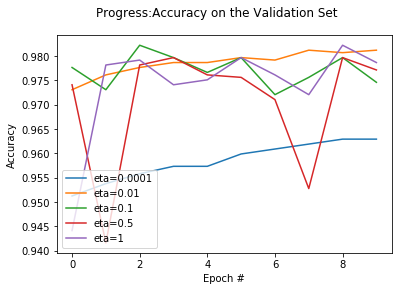

In [6]:
# YOUR CODE HERE
     
#X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
#y = np.array([0,0,1,1,0])
X=data.train_x
y=data.train_y
XVal=data.valid_x
yVal=data.valid_y

accuracylist1=[]
accuracylist2=[]
accuracylist3=[]
accuracylist4=[]
accuracylist5=[]
etarange=[.0001, .01, .1, .5, 1]
#classifier_1 = LogReg(X, y, 0.5)
classifier_1 = LogReg(X, y, etarange[0])
classifier_2 = LogReg(X, y, etarange[1])
classifier_3 = LogReg(X, y, etarange[2])
classifier_4 = LogReg(X, y, etarange[3])
classifier_5 = LogReg(X, y, etarange[4])
for i in range(0,10):
    print("Epoch # ",i)       
    train_x,test_x,train_y,test_y= train_test_split(
               X,y, test_size=0.25, shuffle=True)
    classifier_1.sgd_update(train_x,train_y)
    classifier_2.sgd_update(train_x,train_y)
    classifier_3.sgd_update(train_x,train_y)
    classifier_4.sgd_update(train_x,train_y)
    classifier_5.sgd_update(train_x,train_y)
    log_prob1, accuracy1 = classifier_1.progress(XVal,yVal, 'sgd_update')
    log_prob2, accuracy2 = classifier_2.progress(XVal,yVal, 'sgd_update')
    log_prob3, accuracy3 = classifier_3.progress(XVal,yVal, 'sgd_update')
    log_prob4, accuracy4 = classifier_4.progress(XVal,yVal, 'sgd_update')
    log_prob5, accuracy5 = classifier_5.progress(XVal,yVal, 'sgd_update')
    
    accuracylist1.append(accuracy1)
    accuracylist2.append(accuracy2)
    accuracylist3.append(accuracy3)
    accuracylist4.append(accuracy4)
    accuracylist5.append(accuracy5)
    
plt.plot(range(0,10),accuracylist1,label="eta=0.0001")
plt.plot(range(0,10),accuracylist2,label="eta=0.01")
plt.plot(range(0,10),accuracylist3,label="eta=0.1")
plt.plot(range(0,10),accuracylist4,label="eta=0.5")
plt.plot(range(0,10),accuracylist5,label="eta=1")
plt.legend(loc="lower left")
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.suptitle('Progress:Accuracy on the Validation Set ')


plt.show()

**Q:** After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART C : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART D : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part C below. DO NOT DELETE THE CELL

epoch#  0


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:219: RuntimeWarning: divide by zero encountered in log


epoch#  1
epoch#  2
epoch#  3
epoch#  4
epoch#  5
epoch#  6
epoch#  7
epoch#  8
epoch#  9


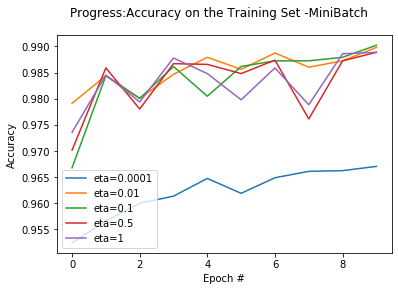

In [26]:
# YOUR CODE HERE
     
#X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
#y = np.array([0,0,1,1,0])
X=data.train_x
y=data.train_y
XVal=data.valid_x
yVal=data.valid_y

accuracylist1=[]
accuracylist2=[]
accuracylist3=[]
accuracylist4=[]
accuracylist5=[]
etarange=[.0001, .01, .1, .5, 1]
#classifier_1 = LogReg(X, y, 0.5)
#Train_x,test_x,Train_y,test_y= train_test_split(
      #          X, y, test_size=0.2, shuffle=True)

classifier_1 = LogReg(X, y, etarange[0])
classifier_2 = LogReg(X, y, etarange[1])
classifier_3 = LogReg(X, y, etarange[2])
classifier_4 = LogReg(X, y, etarange[3])
classifier_5 = LogReg(X, y, etarange[4])
for i in range(0,10):
    print("epoch# ",i)    
    train_x,test_x,train_y,test_y= train_test_split(
               X,y, test_size=0.25, shuffle=True)
    classifier_1.mini_batch_update(train_x,train_y,100)
    classifier_2.mini_batch_update(train_x,train_y,100)
    classifier_3.mini_batch_update(train_x,train_y,100)
    classifier_4.mini_batch_update(train_x,train_y,100)
    classifier_5.mini_batch_update(train_x,train_y,100)
    log_prob1, accuracy1 = classifier_1.progress(train_x,train_y, 'mini_batch_update',100)
    log_prob2, accuracy2 = classifier_2.progress(train_x,train_y, 'mini_batch_update',100)
    log_prob3, accuracy3 = classifier_3.progress(train_x,train_y, 'mini_batch_update',100)
    log_prob4, accuracy4 = classifier_4.progress(train_x,train_y, 'mini_batch_update',100)
    log_prob5, accuracy5 = classifier_5.progress(train_x,train_y, 'mini_batch_update',100)
    
    accuracylist1.append(accuracy1)
    accuracylist2.append(accuracy2)
    accuracylist3.append(accuracy3)
    accuracylist4.append(accuracy4)
    accuracylist5.append(accuracy5)
    
plt.plot(range(0,10),accuracylist1,label="eta=0.0001")
plt.plot(range(0,10),accuracylist2,label="eta=0.01")
plt.plot(range(0,10),accuracylist3,label="eta=0.1")
plt.plot(range(0,10),accuracylist4,label="eta=0.5")
plt.plot(range(0,10),accuracylist5,label="eta=1")
plt.legend(loc="lower left")
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.suptitle('Progress:Accuracy on the Training Set -MiniBatch')


plt.show()

Implement part D below. DO NOT DELETE THE CELL

epoch#  0


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:219: RuntimeWarning: divide by zero encountered in log


epoch#  1
epoch#  2
epoch#  3
epoch#  4
epoch#  5
epoch#  6
epoch#  7
epoch#  8
epoch#  9


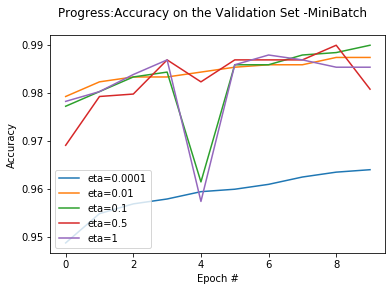

In [25]:
# YOUR CODE HERE 

#X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
#y = np.array([0,0,1,1,0])
X=data.train_x
y=data.train_y
XVal=data.valid_x
yVal=data.valid_y

accuracylist1=[]
accuracylist2=[]
accuracylist3=[]
accuracylist4=[]
accuracylist5=[]
etarange=[.0001, .01, .1, .5, 1]
#classifier_1 = LogReg(X, y, 0.5)
#Train_x,test_x,Train_y,test_y= train_test_split(
      #          X, y, test_size=0.2, shuffle=True)

classifier_1 = LogReg(X, y, etarange[0])
classifier_2 = LogReg(X, y, etarange[1])
classifier_3 = LogReg(X, y, etarange[2])
classifier_4 = LogReg(X, y, etarange[3])
classifier_5 = LogReg(X, y, etarange[4])
for i in range(0,10):
    print("epoch# ",i)    
    train_x,test_x,train_y,test_y= train_test_split(
               X,y, test_size=0.25, shuffle=True)
    classifier_1.mini_batch_update(train_x,train_y,100)
    classifier_2.mini_batch_update(train_x,train_y,100)
    classifier_3.mini_batch_update(train_x,train_y,100)
    classifier_4.mini_batch_update(train_x,train_y,100)
    classifier_5.mini_batch_update(train_x,train_y,100)
    log_prob1, accuracy1 = classifier_1.progress(XVal,yVal, 'mini_batch_update',100)
    log_prob2, accuracy2 = classifier_2.progress(XVal,yVal, 'mini_batch_update',100)
    log_prob3, accuracy3 = classifier_3.progress(XVal,yVal, 'mini_batch_update',100)
    log_prob4, accuracy4 = classifier_4.progress(XVal,yVal, 'mini_batch_update',100)
    log_prob5, accuracy5 = classifier_5.progress(XVal,yVal, 'mini_batch_update',100)
    
    accuracylist1.append(accuracy1)
    accuracylist2.append(accuracy2)
    accuracylist3.append(accuracy3)
    accuracylist4.append(accuracy4)
    accuracylist5.append(accuracy5)
    
plt.plot(range(0,10),accuracylist1,label="eta=0.0001")
plt.plot(range(0,10),accuracylist2,label="eta=0.01")
plt.plot(range(0,10),accuracylist3,label="eta=0.1")
plt.plot(range(0,10),accuracylist4,label="eta=0.5")
plt.plot(range(0,10),accuracylist5,label="eta=1")
plt.legend(loc="lower left")
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')
plt.suptitle('Progress:Accuracy on the Validation Set -MiniBatch')
plt.show()

**Q:** [5 pts] Describe the role of learning rate (eta) on the efficiency of convergence during training?

The 0.01, 0.1,0.5 and 1 eta's all appear to converge around the same epoch (8 or 9), but the accuracy of plots for eta's of 1 and 0.5 tend to rise fastest, but often bounce to lower accuracies multiple before settling. The 0.1 eta appears to have the best combination of quick improvement, and a relatively smooth curve to convergence, with not much backsliding.
The 0.0001 eta's appear to move to convergence very slowly and is usually around 0.95 or 0.96 by the 10th epoch. Only in the minibatch accuracy with the training set did backsliding ever occur. Models with a 0.0001 eta would probably take a 10-15 more epochs to converge in addition to the 10 that were already run.

**Q:** [5 pts] Describe the role of the number of epochs on validation accuracy?

The number of epochs generally to makes the accuracies improve  more, and some even appeared to be converging around epoch 9. However, in part B, multiple curves did not appear to be heading towards convergence, and had a moderate amount of backsliding every other epoch. In multiple instances, models droped by 0.03 accuracy for a single epoch, then returned or improved to what they had been before

### [ 30 points] Problem 2: Implementing the Logistic Regression Classifier for Multinomial Classification

You will now create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

* [5 pts] 2.1 Normalize your data.
* [5 pts] 2.2 Transform your outputs into a set of binary features via one-hot encoding.
* [5 pts] 2.3 Write get_optimal_parameters - train all ten models at once.
* [5 pts] 2.4 Calculate the accuracy of your model on Train and Test data.
* [5 pts] 2.5 Generate a confusion matrix on test and train Data.
* [5 pts] 2.6 Predict the labels of the first ten datapoints from your test set alongside the images of those same datapoints.

In [7]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set
        #data2.train_x
        print("size= ",self.train_x.shape[0])   
        print("size= ",self.train_x.shape[1])   
        #28x28=784
        #train_x shape=  (50000, 784
        #train_y shape=  (50000,)
        #test_x shape=  (10000, 784)
        #test_y shape=  (10000,)

size=  50000
size=  784
[5 0 4 1 9 2 1 3 1 4]
true label: 3


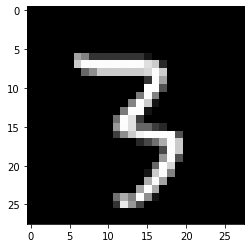

In [8]:
data2 = Numbers2('./mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[44],data2.train_y[44])
#X pixel values are between 0 and 1, where 0=black, 1=white

#print("size= ",data2.train_x.shape[1])       

In [ ]:
from sklearn import preprocessing
from datetime import datetime

class MultiLogReg:
    
    def __init__(self, X, y, eta = 0.01):
        #print(X.shape)
        self.X = self.normalize_data(X)
        self.y = self.one_hot_encoding(y)
        self.eta = eta
        self.one_hot_encoding(y)
        #print(self.y[:10,:].shape)
       # print(self.y[:10,:])
       # print("-------")
        #print(self.y[:10,3])
        #print(self.y[:10,3].shape)
        #print(type(self.y[:10,3]))
        
        
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        
        encoder= np.zeros((y.size, 10)) #rows,col's
        #print(encoder.shape)
        #print(y[:10])
        for n in range(0,y.size):
            yvalue=y[n]
            encoder[n][yvalue]+=1
        #print(encoder[:10,:])
        #print(y.shape)
        return encoder
    def normalize_data(self, X):
        # TO DO: Normalize the feature values of dataset X using
        #the mean and standard deviation of the respective features 
        
        #According to https://scikit-learn.org/stable/modules/preprocessing.html
        #The basic version of the function results in Scaled data 
        #with zero mean and unit variance
        X_scaled = preprocessing.scale(X)
        
        return X_scaled
        
    def get_optimal_parameters(self,weights=0):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to it's class which is (0-9), and the cost function will be against all of
        #the other numbers "the rest".
        """
        Notes from piazza
        The optimal_parameters function will create a LogReg class for each digit, yes. 
        Your training features will be the data2.train_x, and your y classes will be "1"
        if in class 0, and "0" otherwise. Then just do regular shuffle/split/train until 
        you cease seeing improvement in accuracy.
        """
        accuracylist0=[]
        accuracylist1=[]
        accuracylist2=[]
        accuracylist3=[]
        accuracylist4=[]
        accuracylist5=[]
        accuracylist6=[]
        accuracylist7=[]
        accuracylist8=[]
        accuracylist9=[]
        
        classifier_0 = LogReg(self.X, self.y[:,0], self.eta)
        classifier_1 = LogReg(self.X, self.y[:,1], self.eta)
        classifier_2 = LogReg(self.X, self.y[:,2], self.eta)
        classifier_3 = LogReg(self.X, self.y[:,3], self.eta)
        classifier_4 = LogReg(self.X, self.y[:,4], self.eta)
        classifier_5 = LogReg(self.X, self.y[:,5], self.eta)
        classifier_6 = LogReg(self.X, self.y[:,6], self.eta)
        classifier_7 = LogReg(self.X, self.y[:,7], self.eta)
        classifier_8 = LogReg(self.X, self.y[:,8], self.eta)
        classifier_9 = LogReg(self.X, self.y[:,9], self.eta)
        
        batchsize=1000
        epochmax=15
        accuracy0=0
       
        for i in range(0,epochmax):

            train_x,test_x,train_y,test_y= train_test_split(
                   self.X,self.y, test_size=0.25, shuffle=True)
            #print("test_x shape =" test_x)
            #print("test_y shape =" test_x)  
              #  test_x,test_y[:,0]
            if i==(epochmax-1):    
                weights0=classifier_0.mini_batch_update(train_x,train_y[:,0],batchsize)
                weights1=classifier_1.mini_batch_update(train_x,train_y[:,1],batchsize)
                weights2=classifier_2.mini_batch_update(train_x,train_y[:,2],batchsize)
                weights3=classifier_3.mini_batch_update(train_x,train_y[:,3],batchsize)
                weights4=classifier_4.mini_batch_update(train_x,train_y[:,4],batchsize)
                weights5=classifier_5.mini_batch_update(train_x,train_y[:,5],batchsize)
                weights6=classifier_6.mini_batch_update(train_x,train_y[:,6],batchsize)
                weights7=classifier_7.mini_batch_update(train_x,train_y[:,7],batchsize)
                weights8=classifier_8.mini_batch_update(train_x,train_y[:,8],batchsize)
                weights9=classifier_9.mini_batch_update(train_x,train_y[:,9],batchsize)
                
        
            else: 
                classifier_0.mini_batch_update(train_x,train_y[:,0],batchsize)
                classifier_1.mini_batch_update(train_x,train_y[:,1],batchsize)
                classifier_2.mini_batch_update(train_x,train_y[:,2],batchsize)
                classifier_3.mini_batch_update(train_x,train_y[:,3],batchsize)
                classifier_4.mini_batch_update(train_x,train_y[:,4],batchsize)
                classifier_5.mini_batch_update(train_x,train_y[:,5],batchsize)
                classifier_6.mini_batch_update(train_x,train_y[:,6],batchsize)
                classifier_7.mini_batch_update(train_x,train_y[:,7],batchsize)
                classifier_8.mini_batch_update(train_x,train_y[:,8],batchsize)
                classifier_9.mini_batch_update(train_x,train_y[:,9],batchsize)
                   
            log_prob0, accuracy0 = classifier_0.progress(test_x,test_y[:,0], 'mini_batch_update',batchsize)
            log_prob1, accuracy1 = classifier_1.progress(test_x,test_y[:,1], 'mini_batch_update',batchsize)
            log_prob2, accuracy2 = classifier_2.progress(test_x,test_y[:,2], 'mini_batch_update',batchsize)
            log_prob3, accuracy3 = classifier_3.progress(test_x,test_y[:,3], 'mini_batch_update',batchsize)
            log_prob4, accuracy4 = classifier_4.progress(test_x,test_y[:,4], 'mini_batch_update',batchsize)
            log_prob5, accuracy5 = classifier_5.progress(test_x,test_y[:,5], 'mini_batch_update',batchsize)
            log_prob6, accuracy6 = classifier_6.progress(test_x,test_y[:,6], 'mini_batch_update',batchsize)
            log_prob7, accuracy7 = classifier_7.progress(test_x,test_y[:,7], 'mini_batch_update',batchsize)
            log_prob8, accuracy8 = classifier_8.progress(test_x,test_y[:,8], 'mini_batch_update',batchsize)
            log_prob9, accuracy9 = classifier_9.progress(test_x,test_y[:,9], 'mini_batch_update',batchsize)
            
            accuracylist0.append(accuracy0)
            accuracylist1.append(accuracy1)
            accuracylist2.append(accuracy2)
            accuracylist3.append(accuracy3)
            accuracylist4.append(accuracy4)
            accuracylist5.append(accuracy5)
            accuracylist6.append(accuracy6)
            accuracylist7.append(accuracy7)
            accuracylist8.append(accuracy8)
            accuracylist9.append(accuracy9)

            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            
            print("epoch# ",i,"  accuracy0=",accuracy0,
                  "   Currenttime:",current_time) 
            
        plt.plot(range(0,epochmax),accuracylist0,label="0")
        plt.plot(range(0,epochmax),accuracylist1,label="1")
        plt.plot(range(0,epochmax),accuracylist2,label="2")
        plt.plot(range(0,epochmax),accuracylist3,label="3")
        plt.plot(range(0,epochmax),accuracylist4,label="4")
        plt.plot(range(0,epochmax),accuracylist5,label="5")
        plt.plot(range(0,epochmax),accuracylist6,label="6")
        plt.plot(range(0,epochmax),accuracylist7,label="7")
        plt.plot(range(0,epochmax),accuracylist8,label="8")
        plt.plot(range(0,epochmax),accuracylist9,label="9")

        
        plt.legend(loc="lower left")
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch #')
        plt.suptitle('Progress:Accuracy on the Test Set -MiniBatch')
        plt.show()
        
        
        return (weights0,weights1,weights2,weights3,weights4,weights5,weights6,weights7,weights8,weights9)
        
    def predict(self, test_image, test_label,weights):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        
        problist= np.zeros((10, 2)) 
        problist[:,0]= range(0,10)
        batchsize=1
        correctcount_traingroup=0
     
        for j in range(0,10):
            sigmd = 1/(1+(np.exp(-1*np.dot(weights[j],test_image)))) 
            problist[j,1]= sigmd

        return problist
         

In [ ]:
# DO NOT DELETE THIS CELL !!!

In [ ]:
# DO NOT DELETE THIS CELL !!!

### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most. Finally use the predict method to predict the labels for the FIRST 10 instances from the test set, while also plotting the respective images for validation.

Train a MultiLogReg Model in the cell below. DO NOT DELETE THE CELL

/home/scott/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/scott/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in exp
/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:219: RuntimeWarning: divide by zero encountered in log


epoch#  0   accuracy0= 0.79136    Currenttime: 22:43:40
epoch#  1   accuracy0= 0.7948    Currenttime: 22:43:54
epoch#  2   accuracy0= 0.78104    Currenttime: 22:44:12
epoch#  3   accuracy0= 0.80392    Currenttime: 22:44:30
epoch#  4   accuracy0= 0.71968    Currenttime: 22:44:51
epoch#  5   accuracy0= 0.75984    Currenttime: 22:45:12
epoch#  6   accuracy0= 0.79384    Currenttime: 22:45:33
epoch#  7   accuracy0= 0.80528    Currenttime: 22:45:48
epoch#  8   accuracy0= 0.79576    Currenttime: 22:46:03
epoch#  9   accuracy0= 0.80296    Currenttime: 22:46:19
epoch#  10   accuracy0= 0.78648    Currenttime: 22:46:34
epoch#  11   accuracy0= 0.78048    Currenttime: 22:46:49
epoch#  12   accuracy0= 0.8028    Currenttime: 22:47:04
epoch#  13   accuracy0= 0.76608    Currenttime: 22:47:19
epoch#  14   accuracy0= 0.74512    Currenttime: 22:47:33


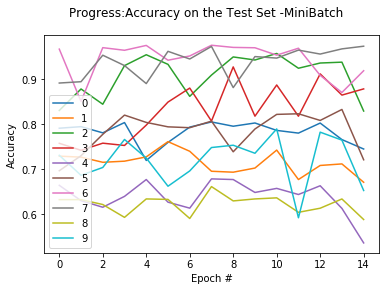

In [15]:
# YOUR CODE HERE
g=MultiLogReg(data2.train_x,data2.train_y)
models= g.get_optimal_parameters()

Compute the accuracy on the train and test data from Numbers2 using the model you trained above. DO NOT DELETE THE CELL

In [40]:
# YOUR CODE HERE

# output train and test groups of data individually! (The kind at the original split) Do not combine them

#loop through each 
#for p in range(0,):

X_train_norm = preprocessing.scale(data2.train_x)
X_test_norm = preprocessing.scale(data2.test_x)
correctcount_traingroup=0
correctcount_testgroup=0



for p in range(0,data2.train_x.shape[0]):

    probA=g.predict(X_train_norm[p],data2.train_y[p],models)
    
    yguess_v1 = np.where(probA[:,1] == np.amax(probA[:,1]))
    yguess_v2=yguess_v1[0]
    yguess_v3=yguess_v2[0]
    #print("prob=",prob)
    #print(np.amax(prob[:,1]))
    #print("yguess=",yguess_v3)
    #print("y actual= ",data2.train_y[p])
    if(yguess_v3==data2.train_y[p]):
        correctcount_traingroup+=1
    #print("# correct=", correctcount_traingroup)   
    
accuracy_traingroup= correctcount_traingroup/data2.train_x.shape[0]
print("accuracy_for train data=",accuracy_traingroup) 



for p in range(0,data2.test_x.shape[0]):
    
    probB=g.predict(X_test_norm[p],data2.test_y[p],models)
    yguess_v1 = np.where(probB[:,1] == np.amax(probB[:,1]))
    yguess_v2=yguess_v1[0]
    yguess_v3=yguess_v2[0]
                                                 
    if(yguess_v3==data2.test_y[p]):
        correctcount_testgroup+=1

            
accuracy_testgroup= correctcount_testgroup/data2.test_x.shape[0]
print("Accuracy for test data=",accuracy_testgroup)   

    

/home/scott/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/scott/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/home/scott/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/scott/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: Us

accuracy_for train data= 0.67054
accuracy_for test data= 0.6869


Plot the confusion matrix on Test and Train Data using the model you trained before. DO NOT DELETE THE CELL

In [49]:
# YOUR CODE HERE
confmatrix=np.zeros((10, 10))
  #in confmatrix, the rows are the actual values,
        #and the columns are the guesses
        
for p in range(0,data2.train_x.shape[0]):

    probA=g.predict(X_train_norm[p],data2.train_y[p],models)
    
    yguess_v1 = np.where(probA[:,1] == np.amax(probA[:,1]))
    yguess_v2=yguess_v1[0]
    yguess_v3=yguess_v2[0]
    
    confmatrix[data2.train_y[p],yguess_v3]+=1
    
for p in range(0,data2.test_x.shape[0]):
    
    probB=g.predict(X_test_norm[p],data2.test_y[p],models)
    yguess_v1 = np.where(probB[:,1] == np.amax(probB[:,1]))
    yguess_v2=yguess_v1[0]
    yguess_v3=yguess_v2[0]
                                                 
    confmatrix[data2.train_y[p],yguess_v3]+=1



print(confmatrix)


/home/scott/.local/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: overflow encountered in exp


[[4924.  181.   98.   51.  207.   85.   49.   43.  177.  118.]
 [ 179. 5654.  101.   74.  242.   81.   62.   55.  238.  119.]
 [ 536.  619. 3262.  123.  422.   86.  104.   47.  612.  148.]
 [ 752.  935.  334. 2101.  372.  224.   71.   60.  981.  303.]
 [ 266.  266.  155.   51. 4330.  189.   43.   57.  163.  319.]
 [ 685.  357.   77.   96.  415. 2720.   70.   38.  699.  212.]
 [1173.  562.  252.   66.  790.  212. 2234.   52.  426.  198.]
 [ 385.  751.  151.   78.  878.   99.   47. 2335.  420. 1101.]
 [ 447.  704.  113.   60.  312.  360.   42.   53. 3528.  167.]
 [ 347.  418.  106.   70.  964.  113.   50.  111.  302. 3485.]]


Predict Labels of First 10 datapoints from your test set and also the plot their images in the cell below. DO NOT DELETE THE CELL

prediction=  1
label=  3


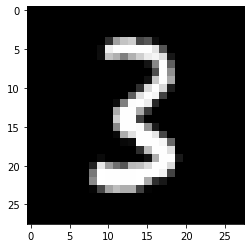

prediction=  8
label=  8


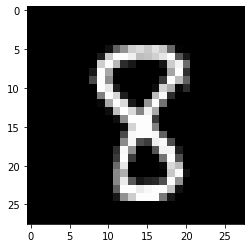

prediction=  0
label=  6


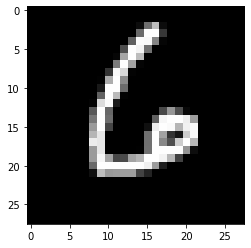

prediction=  9
label=  9


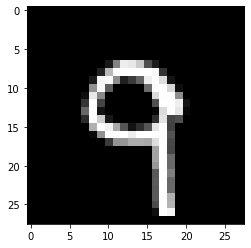

prediction=  6
label=  6


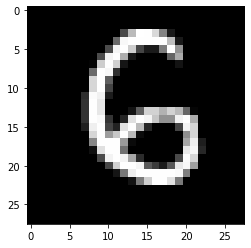

prediction=  4
label=  4


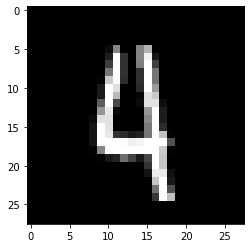

prediction=  5
label=  5


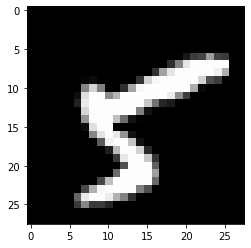

prediction=  0
label=  3


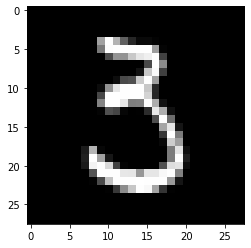

prediction=  8
label=  8


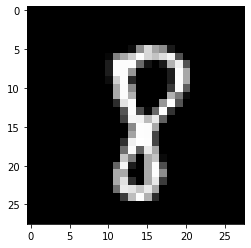

prediction=  4
label=  4


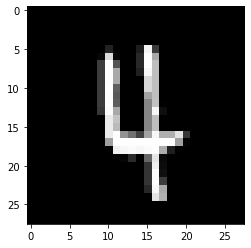

In [41]:
# YOUR CODE HERE
for s in range(0,10):
    probC=g.predict(X_test_norm[s],data2.test_y[s],models)
    yguess_v1 = np.where(probC[:,1] == np.amax(probC[:,1]))
    yguess_v2=yguess_v1[0]
    yguess_v3=yguess_v2[0]
    
    print("prediction= ",yguess_v3 )
    print("label= ", data2.test_y[s])
    
    digitImage=data2.test_x[s].reshape(28,28)
    plt.gray()
    plt.imshow(digitImage)
    plt.show()